In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

In [49]:
# Output File (CSV)
#output_data_file = "output_data/california_fire_cleaned.csv"

##switch to using this file, which has dropped columns we aren't using

In [50]:
#load in file
#fire_data_file = "Resources/California_Fire_Incidents.csv"

#read and display csv with Pandas 
fire_data_df = pd.read_csv("output_data/california_fire_cleaned.csv")
fire_data_df.head()

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,MajorIncident,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,WaterTenders
0,257314.0,NaN,2013,Tuolumne,55,NaN,NaN,NaN,9/6/13,20,...,False,Rim Fire,NaN,8/17/13,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN
1,30274.0,NaN,2013,Los Angeles,19,NaN,NaN,NaN,6/8/13,9,...,False,Powerhouse Fire,NaN,5/30/13,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN
2,27531.0,NaN,2013,Riverside,33,NaN,NaN,NaN,7/30/13,15,...,False,Mountain Fire,NaN,7/15/13,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN
3,27440.0,NaN,2013,Placer,31,NaN,NaN,NaN,8/30/13,20,...,False,American Fire,NaN,8/10/13,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN
4,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,True,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0


In [51]:
#list all of the columns in the table
fire_data_df.columns

Index(['AcresBurned', 'AirTankers', 'ArchiveYear', 'Counties', 'CountyIds',
       'CrewsInvolved', 'Dozers', 'Engines', 'Extinguished', 'Days Burned',
       'Fatalities', 'Featured', 'Final', 'Helicopters', 'Injuries',
       'Latitude', 'Longitude', 'MajorIncident', 'Name', 'PersonnelInvolved',
       'Started', 'StructuresDamaged', 'StructuresDestroyed',
       'StructuresEvacuated', 'StructuresThreatened', 'UniqueId',
       'WaterTenders'],
      dtype='object')

In [113]:
#use county count to include fires that might have affected multiple counties
county_count = fire_data_df["Counties"].value_counts()
county_count
county_df = pd.DataFrame(county_count)
county_df


,Counties
Riverside,146
San Diego,89
Butte,66
San Luis Obispo,64
Shasta,64
Kern,62
Fresno,57
Siskiyou,57
San Bernardino,53
Tehama,51


In [34]:
#list unique counties
county_names = fire_data_df["Counties"].unique()
county_names

array(['Tuolumne', 'Los Angeles', 'Riverside', 'Placer', 'Ventura',
       'Fresno', 'Siskiyou', 'Humboldt', 'Tehama', 'Shasta', 'San Diego',
       'Kern', 'Sonoma', 'Contra Costa', 'Butte', 'Tulare',
       'Santa Barbara', 'Mariposa', 'Monterey', 'El Dorado',
       'San Bernardino', 'Plumas', 'Modoc', 'San Luis Obispo', 'Madera',
       'Inyo', 'Napa', 'San Benito', 'San Joaquin', 'Lake', 'Alameda',
       'Glenn', 'Yolo', 'Sacramento', 'Stanislaus', 'Solano', 'Merced',
       'Mendocino', 'Lassen', 'Amador', 'Yuba', 'Nevada', 'Santa Clara',
       'Calaveras', 'San Mateo', 'Orange', 'Colusa', 'Trinity',
       'Del Norte', 'Mono', 'Alpine', 'Sutter', 'Kings', 'Sierra',
       'Santa Cruz', 'Marin', 'Mexico', 'State of Oregon',
       'State of Nevada'], dtype=object)

In [ ]:
#add count of fires as a column??

In [114]:
#find top ten counties for total fire count
top_ten_counties = county_df.head(10)
top_ten_counties

,Counties
Riverside,146
San Diego,89
Butte,66
San Luis Obispo,64
Shasta,64
Kern,62
Fresno,57
Siskiyou,57
San Bernardino,53
Tehama,51


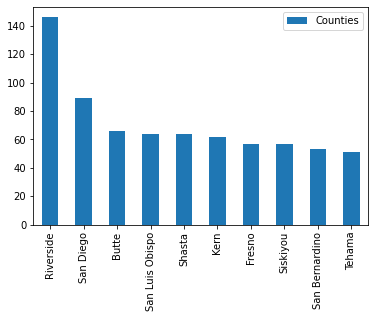

In [115]:
top_ten_counties.plot(kind="bar")
plt.show()

In [111]:
#bar chart for showing top ten counties for total fire count
# x_axis = np.arange(len(top_ten_counties))
# plt.bar(x_axis, top_ten_counties["Counties"])
# plt.xticks(top_ten_counties["index"], rotation="vertical")

In [70]:
#find last ten counties for total fire incidents
last_ten_counties = county_df.tail(10)
last_ten_counties

,Counties
Marin,6
Kings,5
Santa Cruz,4
Sutter,3
San Mateo,3
Mexico,2
Alpine,2
Sierra,2
State of Nevada,1
State of Oregon,1


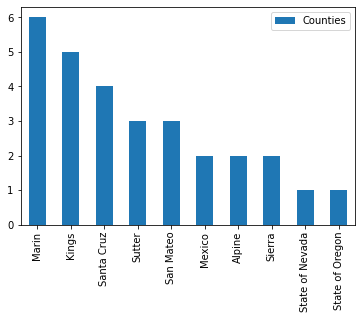

In [112]:
last_ten_counties.plot(kind="bar")
plt.show()

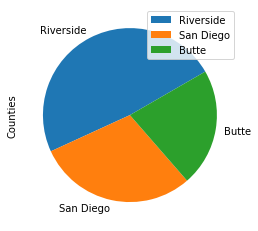

In [127]:
#pie chart to show top three fire count counties 
top_three_counties = county_df.head(3)
top_three_counties

total_county_pie = top_three_counties.plot(kind="pie", subplots=True, startangle=30)

plt.show()

In [237]:
#find count of fires deemed a major incident in each county, using "MajorIncident" column
#get rid of counties with no major incidents
major_df = fire_data_df.loc[fire_data_df["MajorIncident"]==True]
major_df

#using new parameter to find major fires, as defined by Cal Fire: Acres burned > 10
#major_df = fire_data_df.loc[fire_data_df["AcresBurned"]>=10]
#major_df
#len(major_df)

county_major_df = major_df.groupby(["Counties"])["UniqueId"].count().reset_index().sort_values(by= "UniqueId", ascending= False)
county_major_df

#add in county_count to compare total fires vs. major incidents

# major_all_df = pd.DataFrame({"Counties" : county_names, 
#                "Total Fires" : county_count, 
#                "Major Fires" : major_incident_count})
# major_all_df

,Counties,UniqueId
2,Butte,28
32,San Diego,27
38,Shasta,26
13,Lake,21
28,Riverside,18
24,Napa,16
6,El Dorado,15
18,Mariposa,14
7,Fresno,12
31,San Bernardino,11


In [151]:
#chart top five counties with 12 or more major fires
#major_incident_count.loc[(major_incident_count["MajorIncident"]>=12), ["Counties", "MajorIncident"]]

In [238]:
#find top ten counties with major incidents from county_major_df

top_ten_major = county_major_df.head(10)
top_ten_major

,Counties,UniqueId
2,Butte,28
32,San Diego,27
38,Shasta,26
13,Lake,21
28,Riverside,18
24,Napa,16
6,El Dorado,15
18,Mariposa,14
7,Fresno,12
31,San Bernardino,11


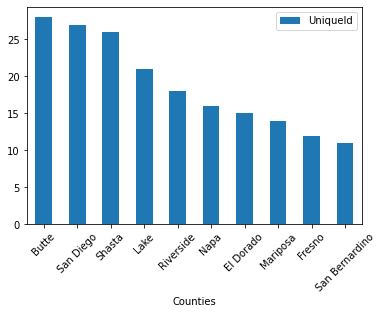

In [259]:
top_ten_major.plot(kind="bar", x="Counties", rot=45)
plt.show()

In [206]:
#find bottom ten counties with major incidents from county_major_df
last_ten_major = county_major_df.tail(10)
last_ten_major

,Counties,UniqueId
18,Marin,6
6,Del Norte,6
13,Kings,5
41,Santa Cruz,4
38,San Mateo,3
50,Sutter,3
22,Mexico,2
43,Sierra,2
49,State of Oregon,1
48,State of Nevada,1


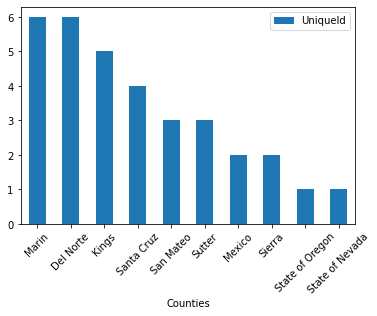

In [260]:
last_ten_major.plot(kind="bar", x="Counties", rot=45)
plt.show()

In [240]:
#find acreage of burned area 
#sum by UniqueID to get unique fires (some fires by county are duplicates)

major_df

#list of county names
county_names = major_df["Counties"].unique()
county_names

#count unique fires with UniqueID
maj_fire_count = major_df.groupby(["Counties"])["UniqueId"].nunique()
maj_fire_count


#find burned acreage with "AvgAcresBurned"
burned_acreage = major_df.groupby(["Counties"])["AvgAcresBurned"].sum()
burned_acreage

#create a new dataframe
acres_burned_df = pd.DataFrame({"Major Fire Count": maj_fire_count, 
                                "Acres Burned": burned_acreage})

acres_burned_df

#sort by acres burned from high to low
acres_burned_sorted = acres_burned_df.sort_values(by= "Acres Burned", ascending= False)
acres_burned_sorted

,Major Fire Count,Acres Burned
Counties,,
Lake,21,580971.0
Mendocino,10,509938.0
Colusa,6,459316.0
Ventura,7,421969.0
Glenn,3,412710.0
Shasta,26,337312.0
Santa Barbara,5,290112.0
Napa,16,268159.0
Trinity,4,230659.0


In [241]:
#display top ten counties in terms of acres burned
top_ten_acreage = acres_burned_sorted.head(10)
top_ten_acreage

,Major Fire Count,Acres Burned
Counties,,
Lake,21,580971.0
Mendocino,10,509938.0
Colusa,6,459316.0
Ventura,7,421969.0
Glenn,3,412710.0
Shasta,26,337312.0
Santa Barbara,5,290112.0
Napa,16,268159.0
Trinity,4,230659.0


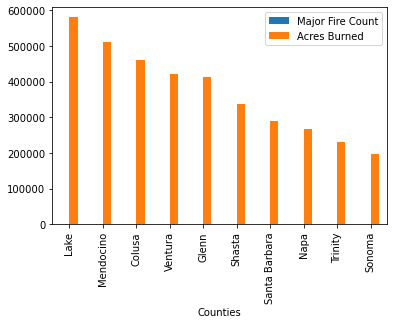

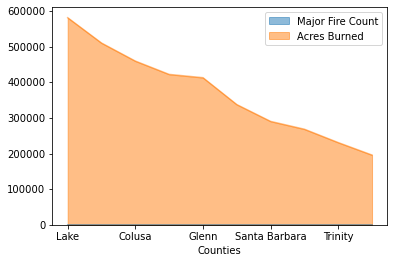

In [242]:
#use different chart? different variables to show the difference?
top_ten_acreage.plot(kind="bar")
plt.show()

#use area plot? df.plot.area(stacked=False)
#just practicing--will bring this style in to compare other variables

top_ten_acreage.plot.area(stacked=False)

In [243]:
#display last ten counties in terms of acres burned
last_ten_acreage = acres_burned_sorted.tail(10)
last_ten_acreage

,Major Fire Count,Acres Burned
Counties,,
Alameda,2,3340.0
Lassen,3,2784.0
San Benito,4,2734.0
Tuolumne,6,2330.0
Merced,1,1333.0
Calaveras,10,1221.0
Santa Cruz,2,408.0
Marin,1,152.0
Sacramento,1,110.0


In [254]:
#find number of injuries and fatalities by county 

major_df

#list of county names
county_names = major_df["Counties"].unique()
county_names

#count unique fires with UniqueID
maj_fire_count = major_df.groupby(["Counties"])["UniqueId"].nunique()
maj_fire_count

#count injuries with "AvgInjuries"
injury_count = major_df.groupby(["Counties"])["Injuries"].sum()
injury_count

#count fatalities with "AvgFatalities"
fatality_count = major_df.groupby(["Counties"])["Fatalities"].sum()
fatality_count

#create a new dataframe
human_toll_df = pd.DataFrame({"Major Fire Count": maj_fire_count, 
                              "Injuries": injury_count,
                              "Fatalities": fatality_count})

human_toll_df

#sort by fatalities
human_toll_fatalities_sorted = human_toll_df.sort_values(by= ["Major Fire Count","Fatalities"], ascending= False)

human_toll_visual = human_toll_fatalities_sorted.head(5)
human_toll_visual

,Major Fire Count,Injuries,Fatalities
Counties,,,
Butte,28,21.0,85.0
San Diego,27,39.0,0.0
Shasta,26,55.0,3.0
Lake,21,8.0,1.0
Riverside,18,33.0,2.0


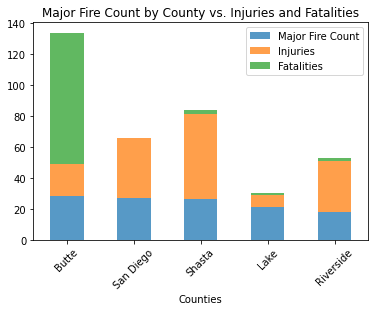

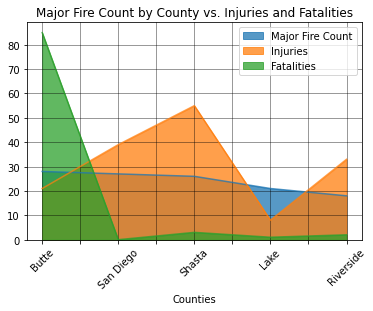

In [263]:
human_toll_visual.plot(kind="bar", stacked=True, rot=45, alpha=0.75)
plt.title("Major Fire Count by County vs. Injuries and Fatalities")
plt.xlabel("Counties")
plt.show()

human_toll_visual.plot.area(stacked=False, rot=45, alpha=0.75)
plt.title("Major Fire Count by County vs. Injuries and Fatalities")
plt.xlabel("Counties")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/County_Fire_Count_Injuries_Fatalities")
plt.show()

In [303]:
#find number of resources involved per county

major_df

#list of county names
county_names = major_df["Counties"].unique()
county_names

#count unique fires with UniqueID
maj_fire_count = major_df.groupby(["Counties"])["UniqueId"].nunique()
maj_fire_count

#count days burned with Days Burned--need to use Average Column
days_burned = major_df.groupby(["Counties"])["AvgDays Burned"].sum()
days_burned

#count 'Helicopters' involved--need to use average column
helicopter_count = major_df.groupby(["Counties"])["AvgHelicopters"].sum()
helicopter_count

#count dozers involved--need to use average column
dozer_count = major_df.groupby(["Counties"])["AvgDozers"].sum()
dozer_count

#count engines involved--need to use average column 
engine_count = major_df.groupby(["Counties"])["AvgEngines"].sum()
engine_count

#count water tankers involved: WaterTenders--need to use average column 
water_tender_count = major_df.groupby(["Counties"])["AvgWaterTenders"].sum()
water_tender_count

#count personnel involved: PersonnelInvolved--need to use average column 
personnel_count = major_df.groupby(["Counties"])["AvgPersonnelInvolved"].sum()
personnel_count

#count crews involved: CrewsInvolved--need to use average column 
crew_count = major_df.groupby(["Counties"])["AvgCrewsInvolved"].sum()
crew_count

#total equipment involved, found with average columns
total_equipment = dozer_count + engine_count + water_tender_count 
total_equipment 

#create a new dataframe 
resources_df = pd.DataFrame({"Major Fire Count": maj_fire_count, 
                            "Days Burned": days_burned,
                            "Dozers": dozer_count, 
                            "Engines": engine_count, 
                            "Water Tenders": water_tender_count, 
                            "Personnel Involved": personnel_count,
                            "Crews Involved": crew_count, 
                            "Total Equipment": total_equipment})

resources_df

resources_df_sorted = resources_df.sort_values(by= ["Major Fire Count","Total Equipment"], ascending= False)
resources_df_sorted.head(10)                                               

KeyError: 'Column not found: AvgDays Burned'

In [268]:
#find average of resources used per unique ID--need to use average column 
avg_resources_used = total_equipment / maj_fire_count
avg_resources_used

#find average number of fatalities per unique ID--need to use average column 
# avg_fatalities = fatality_count / maj_fire_count
# avg_fatalities

#count unique fires with UniqueID
# maj_fire_count = major_df.groupby(["Counties"])["UniqueId"].nunique()
# maj_fire_count

Counties
Alameda             3.000000
Amador             10.625000
Butte              19.928571
Calaveras           7.100000
Colusa             73.166667
Contra Costa        4.000000
El Dorado           3.200000
Fresno             12.250000
Glenn               5.333333
Humboldt           20.333333
Inyo               22.428571
Kern               31.000000
Kings               0.000000
Lake               27.761905
Lassen              2.000000
Los Angeles        21.666667
Madera              8.272727
Marin               0.000000
Mariposa            6.642857
Mendocino          43.700000
Merced              3.000000
Modoc              15.666667
Mono                8.000000
Monterey            0.833333
Napa                4.125000
Nevada              2.400000
Orange             60.000000
Placer              0.000000
Riverside          27.277778
Sacramento         17.000000
San Benito          2.750000
San Bernardino     24.000000
San Diego          21.592593
San Luis Obispo    18.545455
San M

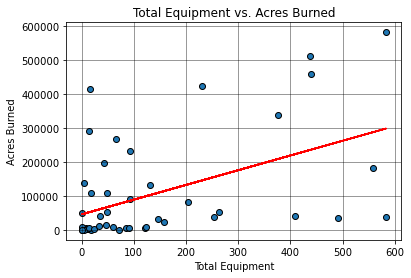

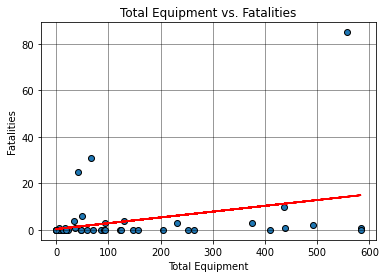

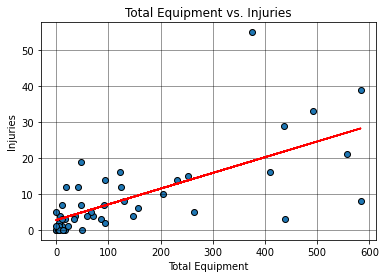

In [301]:
#compare county count of acres burned with use of resources
# plt.scatter(resources_df["Total Equipment"], acres_burned_df["Acres Burned"], marker="o", edgecolor="black")
# plt.title("Total Equipment vs. Acres Burned")
# plt.xlabel("Total Equipment")
# plt.ylabel("Acres Burned")
# plt.rc('grid', linestyle="-", color='black')
# plt.grid(True, alpha=0.5)
# plt.savefig("Total_Equipment_VS_Acres_Burned.png")
# plt.show()

#compare county count of acres burned with use of resources and draw regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
regress_values = total_equipment * slope + intercept
plt.scatter(total_equipment, burned_acreage, marker="o", edgecolor="black")
plt.plot(total_equipment, regress_values, "r-")
plt.title("Total Equipment vs. Acres Burned")
plt.xlabel("Total Equipment")
plt.ylabel("Acres Burned")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/Total_Equipment_VS_Acres_Burned.png")
plt.show()

#compare personnel involved with injuries
# plt.scatter(resources_df["Personnel Involved"], human_toll_df["Injuries"], marker="o", edgecolor="black")
# plt.title("Personnel Involved vs. Injuries")
# plt.xlabel("Personnel Involved")
# plt.ylabel("Injuries")
# plt.rc('grid', linestyle="-", color='black')
# plt.grid(True, alpha=0.5)
# plt.savefig("Personnel_Involved_VS_Injuries.png")
# plt.show()

#compare equipment used with injuries and/or fatalities
# plt.scatter(resources_df["Total Equipment"], human_toll_df["Fatalities"], marker="o", edgecolor="black")
# plt.title("Total Equipment vs. Fatalities")
# plt.xlabel("Total Equipment")
# plt.ylabel("Fatalities")
# plt.rc('grid', linestyle="-", color='black')
# plt.grid(True, alpha=0.5)
# plt.savefig("Total_Equipment_VS_Fatalities.png")
# plt.show()

#compare equipment used with fatalities and find linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, fatality_count)
regress_values = total_equipment * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(total_equipment, fatality_count, marker="o", edgecolor="black")
plt.plot(total_equipment, regress_values, "r-")
plt.title("Total Equipment vs. Fatalities")
plt.xlabel("Total Equipment")
plt.ylabel("Fatalities")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/Total_Equipment_VS_Fatalities.png")
plt.show()

#compare equipment used with injuries and find linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, injury_count)
regress_values = total_equipment * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(total_equipment, injury_count, marker="o", edgecolor="black")
plt.plot(total_equipment, regress_values, "r-")
plt.title("Total Equipment vs. Injuries")
plt.xlabel("Total Equipment")
plt.ylabel("Injuries")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/Total_Equipment_VS_Injuries.png")
plt.show()

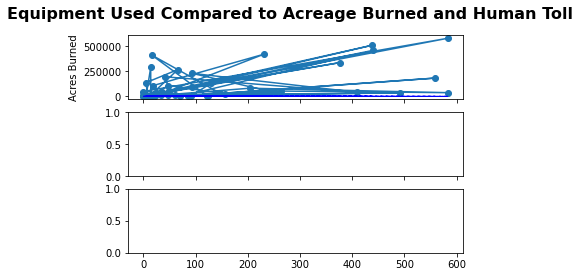

In [302]:
#generate a facet plot of all 3 figures
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Equipment Used Compared to Acreage Burned and Human Toll", fontsize=16, fontweight="bold")

# #(slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# #regress_values = total_equipment * slope + intercept
# ax1.plot(total_equipment, burned_acreage, marker="o")
# ax1.plot(total_equipment, regress_values, "b--", linewidth=1)
# ax1.set_ylabel("Acres Burned")
# plt.show()
# plt.scatter(total_equipment, burned_acreage, marker="o", edgecolor="black")
# plt.plot(total_equipment, regress_values, "r-")

#brought in example to compare
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(year), max(year))
# ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
# ax1.plot(year, vc_fit, "b--", linewidth=1)
# ax1.set_ylabel("Violent Crime Rate")

# ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
# ax2.plot(year, m_fit, "r--", linewidth=1)
# ax2.set_ylabel("Murder Rate")

# ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
# ax3.plot(year, aa_fit, "g--", linewidth=1)
# ax3.set_ylabel("Aggravated Assault Rate")
# ax3.set_xlabel("Year")

# plt.show()